Q1. What is the mathematical formula for a linear SVM?

The mathematical formula for a linear Support Vector Machine (SVM) is:

𝑓
(
𝑥
)
=
𝑤
𝑇
𝑥
+
𝑏
f(x)=w 
T
 x+b

where:

𝑤
w is the weight vector,
𝑥
x is the input feature vector,
𝑏
b is the bias term.
The decision boundary is defined by:

𝑤
𝑇
𝑥
+
𝑏
=
0
w 
T
 x+b=0

SVM aims to find the weight vector 
𝑤
w and bias 
𝑏
b that maximize the margin between the two classes while ensuring that:

𝑦
𝑖
(
𝑤
𝑇
𝑥
𝑖
+
𝑏
)
≥
1
y 
i
​
 (w 
T
 x 
i
​
 +b)≥1

for all training samples 
(
𝑥
𝑖
,
𝑦
𝑖
)
(x 
i
​
 ,y 
i
​
 ), where 
𝑦
𝑖
y 
i
​
  is the class label (+1 or -1).









Q2. What is the objective function of a linear SVM?

The objective function of a linear SVM is to minimize the following expression:

1
2
∥
𝑤
∥
2
2
1
​
 ∥w∥ 
2
 

subject to the constraints:

𝑦
𝑖
(
𝑤
𝑇
𝑥
𝑖
+
𝑏
)
≥
1
∀
𝑖
y 
i
​
 (w 
T
 x 
i
​
 +b)≥1∀i

This objective function aims to find the optimal weight vector 
𝑤
w and bias 
𝑏
b that maximize the margin between the two classes, while the constraints ensure that all data points are correctly classified with a margin of at least 1.








Q3. What is the kernel trick in SVM?

The kernel trick in Support Vector Machines (SVM) is a technique that allows the algorithm to operate in a high-dimensional space without explicitly computing the coordinates of the data in that space. Instead, it uses kernel functions to compute the dot products between the images of all pairs of data points in this high-dimensional space efficiently. This enables SVMs to create complex, non-linear decision boundaries by implicitly mapping the input features into higher-dimensional feature spaces.

Q4. What is the role of support vectors in SVM Explain with example.

In Support Vector Machines (SVM), support vectors are the data points that lie closest to the decision boundary (or hyperplane) and are crucial in defining its position and orientation. These points are pivotal because they directly influence the optimal hyperplane that maximizes the margin between different classes.

Example:
Consider a simple 2D binary classification problem:

Training Data: You have two classes of points, Class A (e.g., blue points) and Class B (e.g., red points).
Hyperplane: The goal is to find the line (hyperplane in 2D) that best separates the two classes with the maximum margin.
Support Vectors: The points from each class that are nearest to the hyperplane. These points lie on the boundary of the margin and are crucial because if you remove them, the position of the hyperplane would change.
In this scenario, the support vectors determine the margins' boundaries, and the SVM algorithm seeks to maximize the distance (margin) between the support vectors of each class. All other points outside this margin do not affect the decision boundary.

Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
SVM?

Hyperplane: The main decision boundary.
Example: In a 2D space, it’s a line that separates two classes.

Marginal Planes: Boundaries that define the margin.
Example: They are the lines that run parallel to the hyperplane and touch the nearest data points from both classes.

Hard Margin: No misclassifications, perfect separation.
Example: Used when data is linearly separable with no noise.

Soft Margin: Allows some misclassifications for better generalization.
Example: Used when data is not perfectly separable.

These illustrations should provide a clear, visual understanding of the key concepts in SVMs.

Q6. SVM Implementation through Iris dataset.
~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
~ Train a linear SVM classifier on the training set and predict the labels for the testing setl
~ Compute the accuracy of the model on the testing setl
~ Plot the decision boundaries of the trained model using two of the featuresl
~ Try different values of the regularisation parameter C and see how it affects the performance of
the model.

Accuracy: 0.80


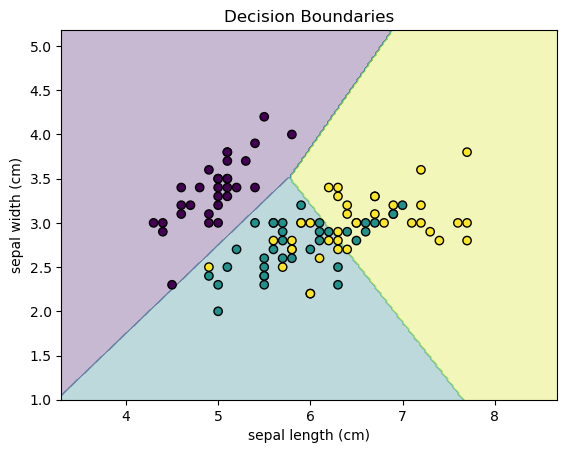

C=0.1 -> Accuracy: 0.82


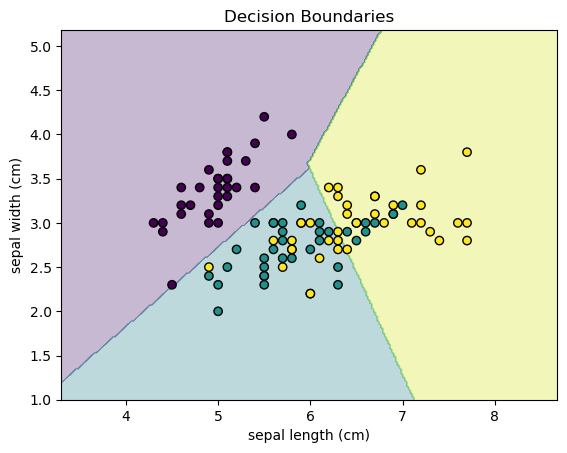

C=1 -> Accuracy: 0.80


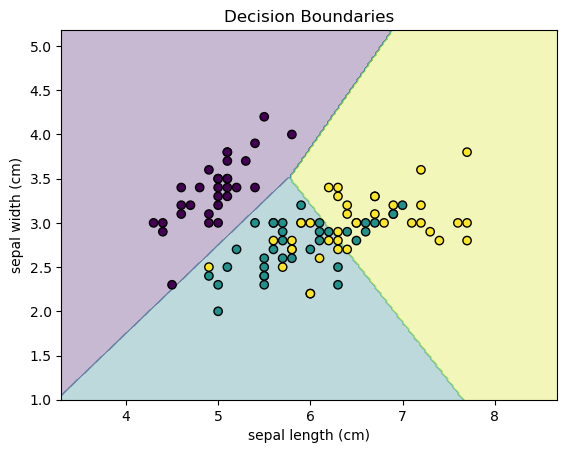

C=10 -> Accuracy: 0.80


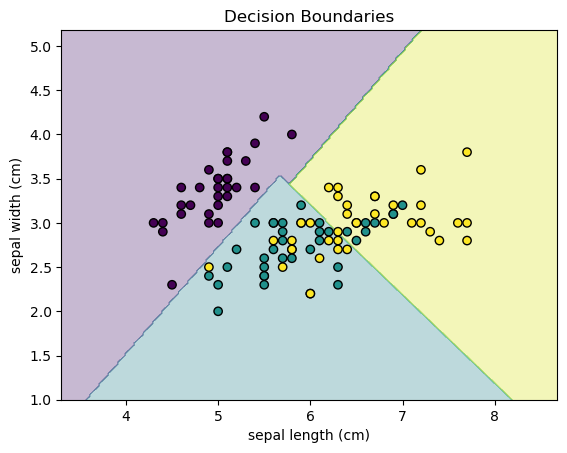

C=100 -> Accuracy: 0.80


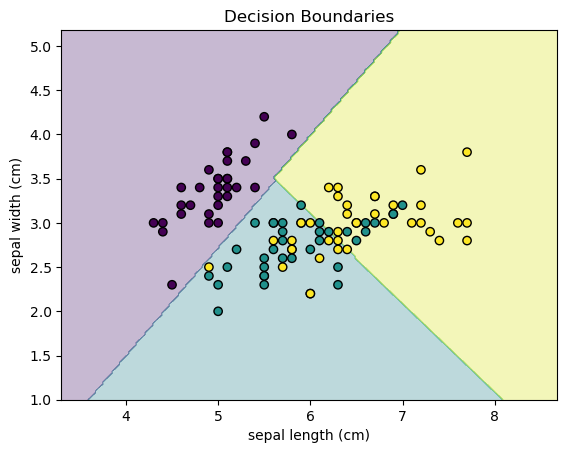

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We will use the first two features for visualization
y = iris.target

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear SVM classifier
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = svm.predict(X_test)

# Compute the accuracy of the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision boundaries of the trained model using two features
def plot_decision_boundaries(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title("Decision Boundaries")
    plt.show()

plot_decision_boundaries(X_train, y_train, svm)

# Try different values of the regularisation parameter C
C_values = [0.1, 1, 10, 100]
for C in C_values:
    svm = SVC(kernel='linear', C=C, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"C={C} -> Accuracy: {accuracy:.2f}")
    plot_decision_boundaries(X_train, y_train, svm)
